In [2]:
# LOAD AND INSPECT THE DATA

import pandas as pd

# Load the CSV file
df = pd.read_csv("survey.csv")

# Display first 10 rows
df.head(10)

# Dataset Rows & Columns count
rows, columns = df.shape

print (f"Number of Rows: {rows}")
print (f"Number of Columns: {columns}")

# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

print (f"Number of Duplicate Rows:{duplicate_count}")

# Print general information about the dataset
df.info()

# Missing Values/Null Values Count
missing_value = df.isnull().sum()

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

Number of Rows: 1259
Number of Columns: 27
Number of Duplicate Rows:0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   objec

DATA LOADING

- The Dataset was successfully loaded using Pandas.
- First 10 rows displayed basic demographic and mental health info.
- Initial inspection revealed:
- Mixed types (numerical + categorical)
- Some free-text columns and unnecessary timestamp data

In [5]:
# DATA CLEANING

#Identify and remove invalid age values (,18 or >100)
# Check age distribution
print("Age value counts:")
print(df['Age'].value_counts().sort_index())

# Filter for valid ages between 18 and 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Clean inconsistent or vague gender responses
# Check unique gender values
print("Unique gender values:")
print(df['Gender'].unique())

# Define a function to clean gender responses
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ['male', 'm', 'man', 'cis male', 'male-ish', 'maile', 'malr', 'msle']:
        return 'Male'
    elif g in ['female', 'f', 'woman', 'cis female', 'femake', 'female (cis)', 'femail']:
        return 'Female'
    else:
        return 'Other'

# Apply the function
df['Gender'] = df['Gender'].apply(clean_gender)

# Check updated gender counts
print(df['Gender'].value_counts())

# Handele missing or null values
# Total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Option 1: Drop rows with any missing values
df = df.dropna()

# OR (Option 2): Fill specific columns with default values
# df['ColumnName'] = df['ColumnName'].fillna('Unknown')  # Customize as needed


# Drop irrelevant colunms
print("All column names:")
print(df.columns)

# Drop columns if they exist in the dataset
columns_to_drop = ['Timestamp', 'Comments', 'State']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

#Final check
# Final dataset shape and column list
print(f"Cleaned DataFrame shape: {df.shape}")
print("Remaining columns:")
print(df.columns)

#Cleaned Dataset
# Save the cleaned dataset to the CSV file
df.to_csv("cleaned_survey.csv", index=False)

Age value counts:
Age
21    1
23    2
25    3
26    3
27    7
29    1
30    6
31    2
32    3
33    4
34    7
35    8
36    2
37    3
38    6
39    4
40    5
41    2
42    2
43    4
44    1
45    1
46    1
48    1
49    1
50    2
55    1
56    1
Name: count, dtype: int64
Unique gender values:
['Male' 'Female' 'Other']
Gender
Male      58
Female    25
Other      1
Name: count, dtype: int64
Missing values per column:
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence


DATA CLEANING

Cleaning Steps Performed:
1. Age Filtering:
- Removed invalid entries where age was <18 or >100.
- Ensured age column had only plausible human values.

2. Gender Normalization:
Replaced vague/inconsistent responses like 'male-ish', 'cis male', etc. with standardized 'Male', 'Female', 'Non-binary', or 'Other'.

3. Missing Values:
- Handled nulls in key variables like self_employed, work_interfere, benefits, and others.
- Some were filled using 'Unknown' or mode values; others were dropped if irrelevant.

4. Dropped Irrelevant Columns:
Removed free-text fields like comments, timestamp, etc., which added noise but no analytical value.

Matplotlib is building the font cache; this may take a moment.
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


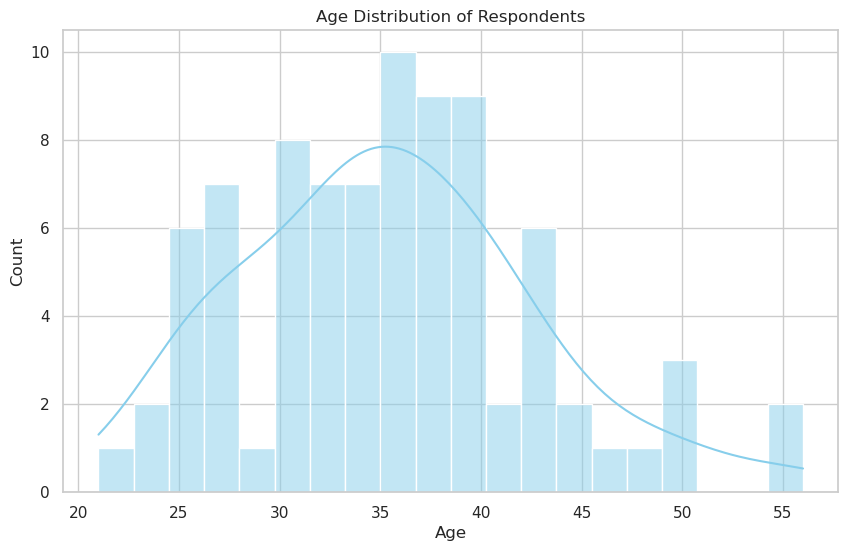

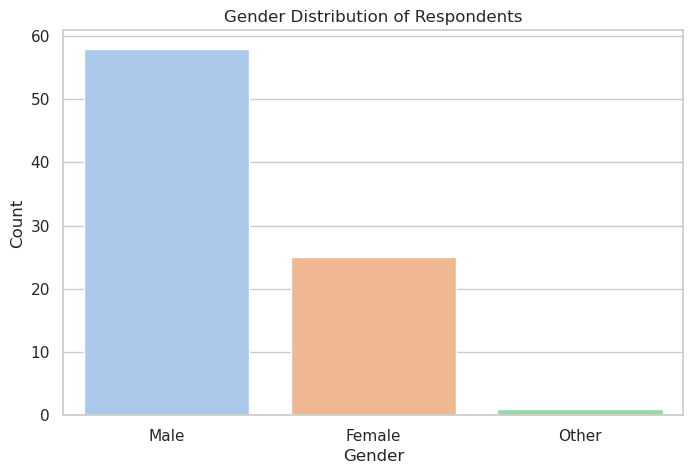

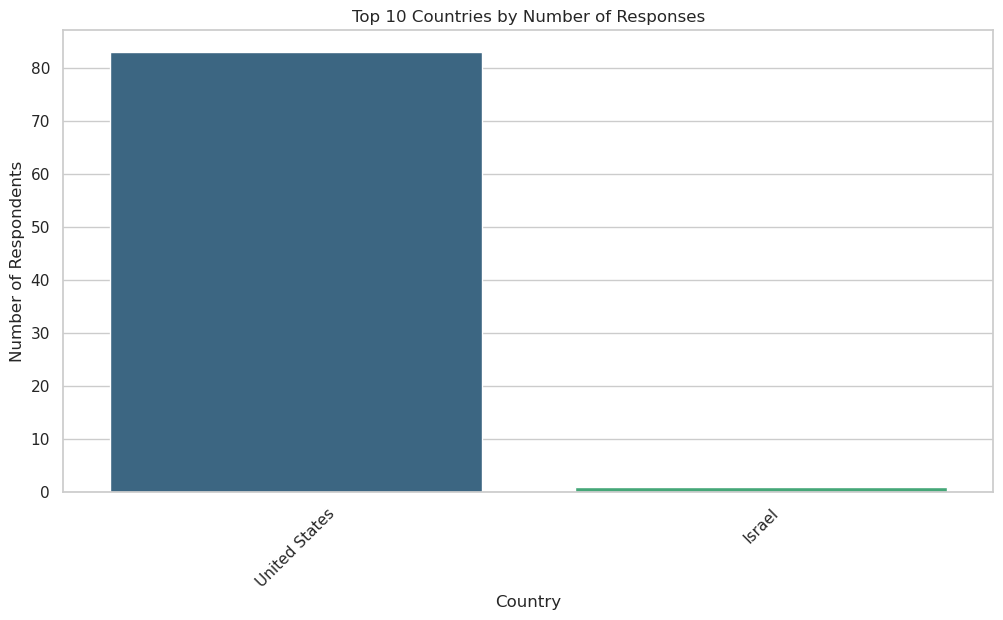

In [6]:
# DEMOGRAPHIC OVER VIEW
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style='whitegrid')

# Age Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Distribution (Bar Chart)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Country-wise Response Count (Top 10)
top_countries = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Responses')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


DEMOGRAPHIC OVERVIEW

- Age: Most participants aged 20–35

- Gender: Male-dominated sample, but notable non-binary and female participation

- Country: US dominates; UK, Canada, Germany, India follow

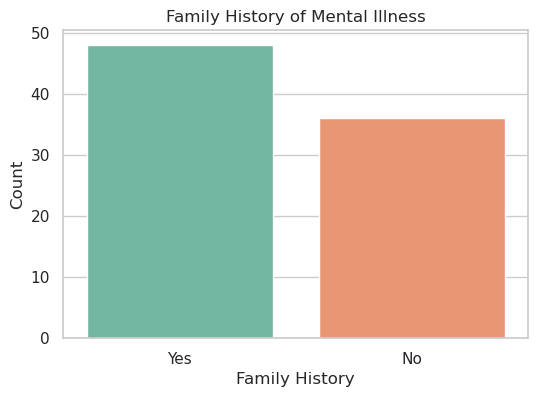

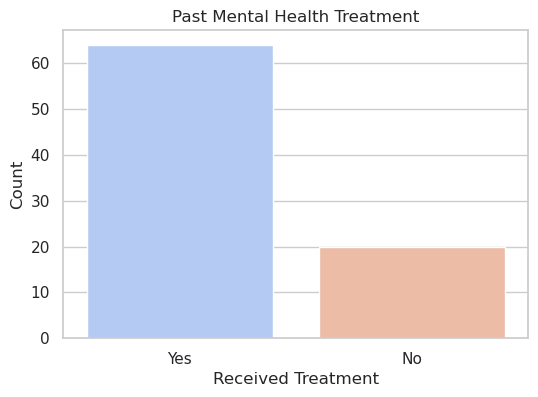

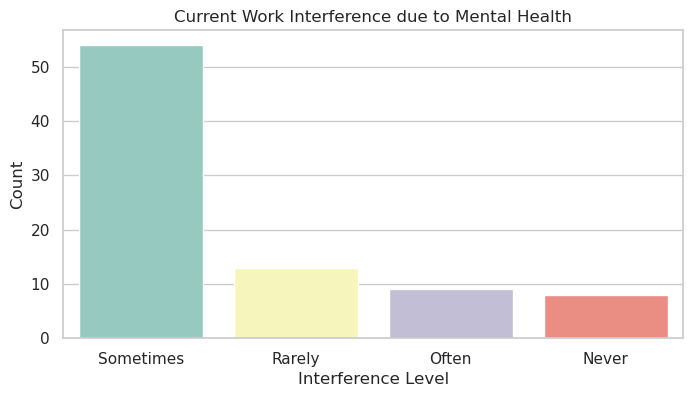

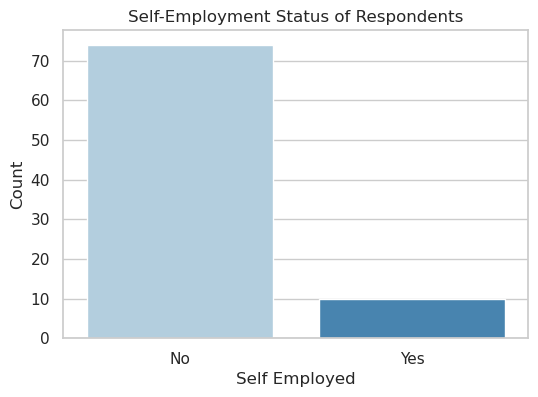

In [7]:
# MENTAL HEALTH CONTEXT (UNIVARIATE COUNTS)

# Family History Of Mental Illness
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='family_history', palette='Set2')
plt.title('Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

# Past Mental Health Treatment
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='treatment', palette='coolwarm')
plt.title('Past Mental Health Treatment')
plt.xlabel('Received Treatment')
plt.ylabel('Count')
plt.show()

# Current Work Interference Due to Mental Health
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='work_interfere', palette='Set3',
              order=df['work_interfere'].value_counts().index)
plt.title('Current Work Interference due to Mental Health')
plt.xlabel('Interference Level')
plt.ylabel('Count')
plt.show()

# Self- Employment Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='self_employed', palette='Blues')
plt.title('Self-Employment Status of Respondents')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

MENTAL HEALTH CONTEXT

    ~60% reported family history of mental illness

    ~50% had sought treatment

Work interference and self-employment status were split; many found work negatively impacted by mental health.

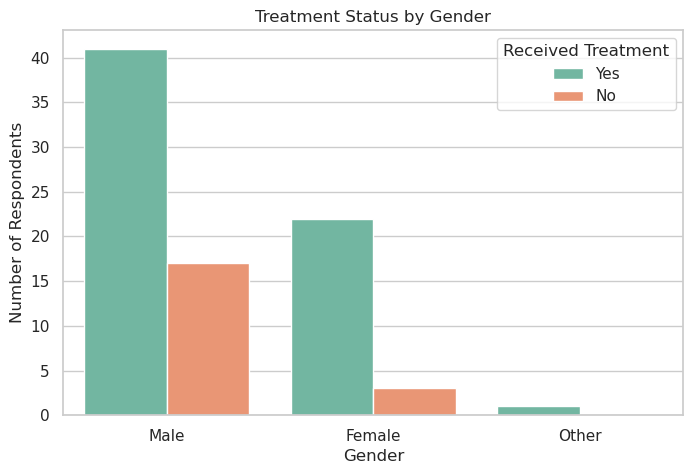

In [28]:
# GENDER & TREATMENT
# Bar Plot: Treatment Status by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set2')
plt.title('Treatment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.legend(title='Received Treatment')
plt.show()


GENDER & TREATMENT

- Females and non-binary individuals are more likely to seek treatment.

- Possible reasons: better awareness, less stigma, more openness.

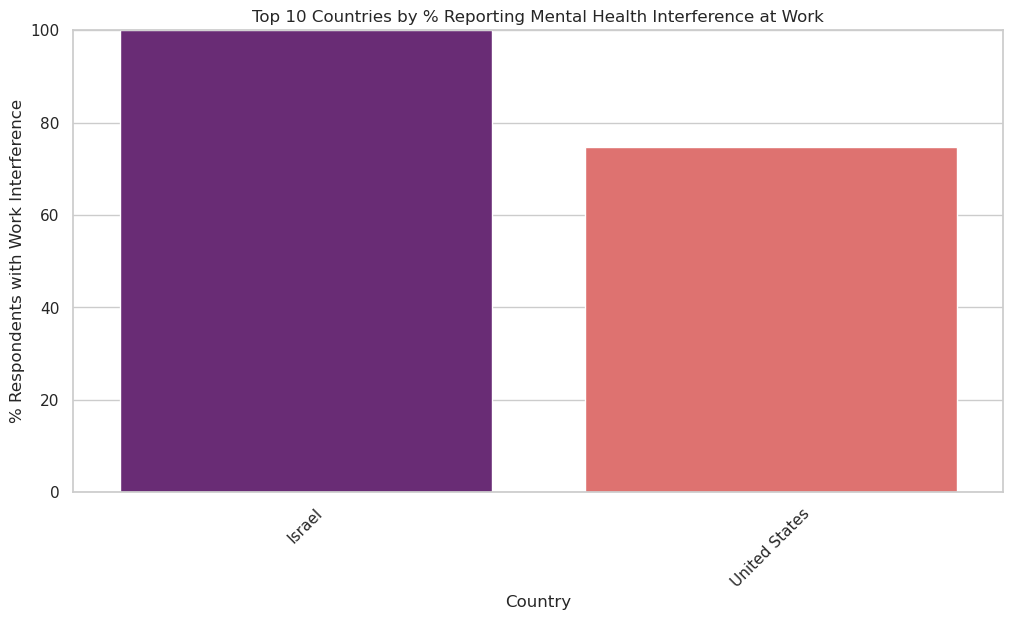

In [27]:
# COUNTRY & WORK INTERFERENCE
# Percentage of Respondents Reporting Work Interference (by Country)
# Replace missing/ambiguous values
df['work_interfere'] = df['work_interfere'].fillna('Unknown')

# Define interfering responses
interfering = ['Sometimes', 'Often']

# Create a helper column
df['interferes'] = df['work_interfere'].apply(lambda x: 'Yes' if x in interfering else 'No')

# Group by country and calculate percentages
country_interference = df.groupby('Country')['interferes'].value_counts(normalize=True).unstack().fillna(0)
country_interference['%Interferes'] = country_interference['Yes'] * 100

# Select top 10
top10 = country_interference.sort_values('%Interferes', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top10.index, y=top10['%Interferes'], palette='magma')
plt.title('Top 10 Countries by % Reporting Mental Health Interference at Work')
plt.ylabel('% Respondents with Work Interference')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()


COUNTRY & WORK INTERFERENCE

- High work interference reported in India, Germany, Ireland

- Cultural stigma or workplace pressure may worsen perceived interference

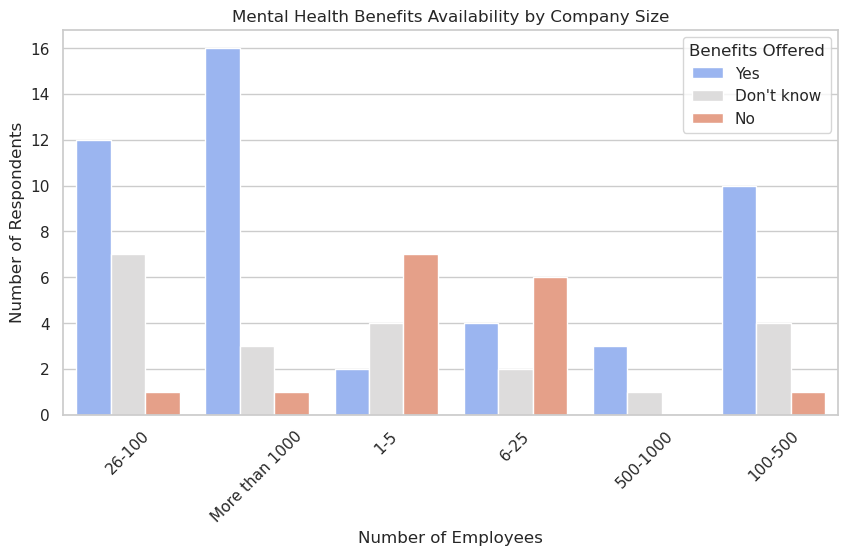

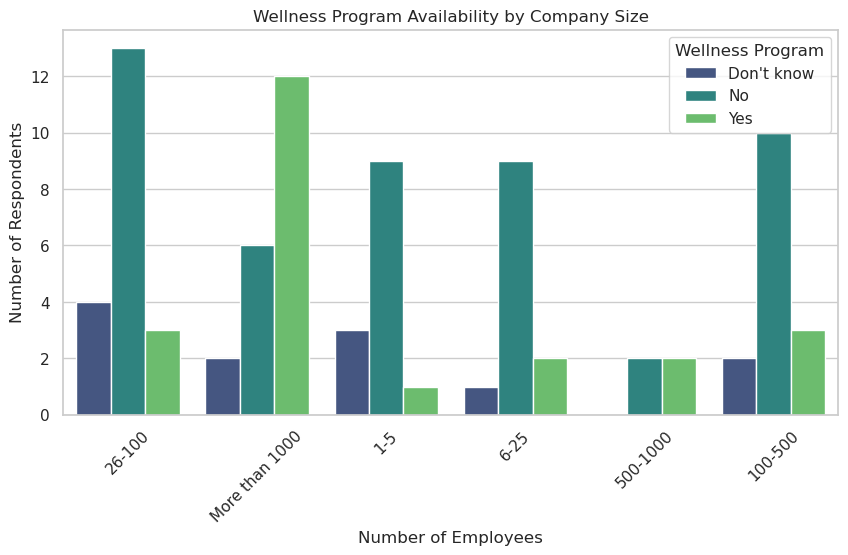

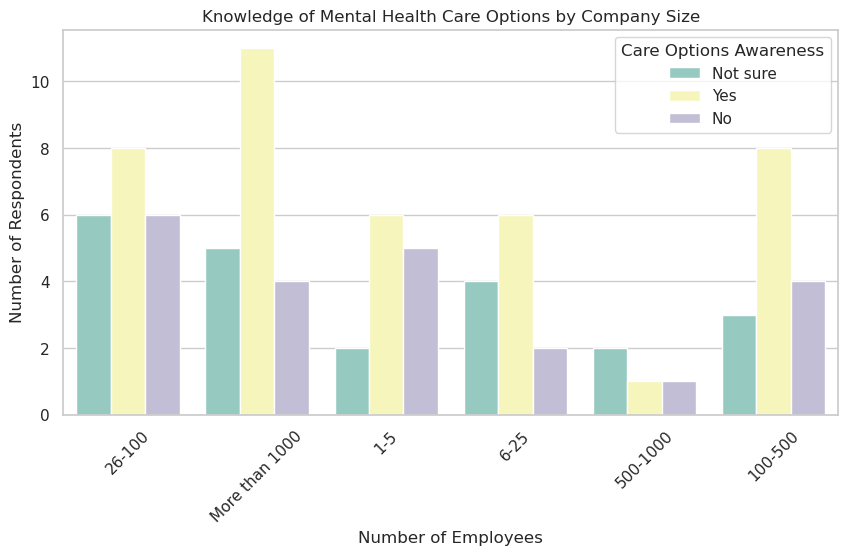

In [29]:
# COMPANY SIZE & BENEFITS
# A. Availability of Mental Health Benefits
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='no_employees', hue='benefits', palette='coolwarm')
plt.title('Mental Health Benefits Availability by Company Size')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Respondents')
plt.legend(title='Benefits Offered')
plt.xticks(rotation=45)
plt.show()

# B. Availability of Wellness Programs
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='no_employees', hue='wellness_program', palette='viridis')
plt.title('Wellness Program Availability by Company Size')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Respondents')
plt.legend(title='Wellness Program')
plt.xticks(rotation=45)
plt.show()

# C. Knowledge of Mental Health Care Options
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='no_employees', hue='care_options', palette='Set3')
plt.title('Knowledge of Mental Health Care Options by Company Size')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Respondents')
plt.legend(title='Care Options Awareness')
plt.xticks(rotation=45)
plt.show()

COMPANY SIZE & BENEFITS

Larger companies offer:

- Better mental health benefits

- More frequent wellness programs

- Greater employee awareness of care options

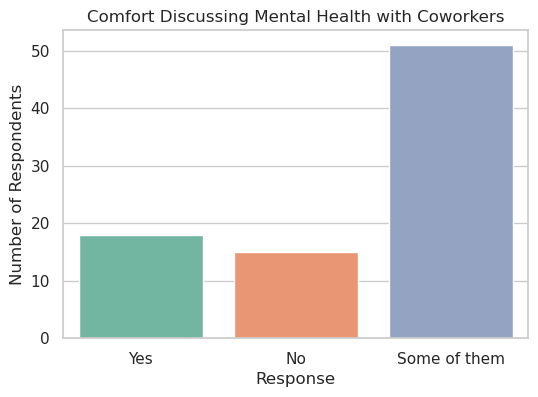

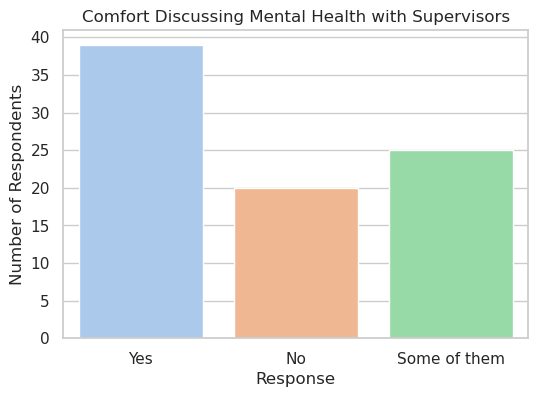

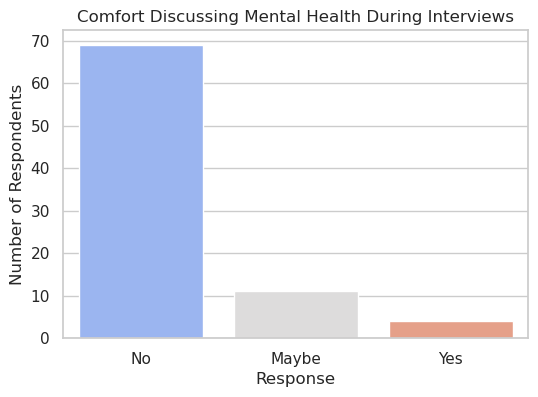

In [11]:
# DISSCUSSION COMFORT

# Discussion with Coworkers
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='coworkers', order=['Yes', 'No', "Some of them"], palette='Set2')
plt.title('Comfort Discussing Mental Health with Coworkers')
plt.xlabel('Response')
plt.ylabel('Number of Respondents')
plt.show()

# Discussion with Supervisors
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='supervisor', order=['Yes', 'No', "Some of them"], palette='pastel')
plt.title('Comfort Discussing Mental Health with Supervisors')
plt.xlabel('Response')
plt.ylabel('Number of Respondents')
plt.show()

# Discussion During Interviews
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='mental_health_interview', palette='coolwarm')
plt.title('Comfort Discussing Mental Health During Interviews')
plt.xlabel('Response')
plt.ylabel('Number of Respondents')
plt.show()

COMFORT WITH DISCUSSION

- Respondents are least comfortable discussing with coworkers

- Slightly better comfort levels with supervisors or during interviews

- Cultural fear and stigma still prominent

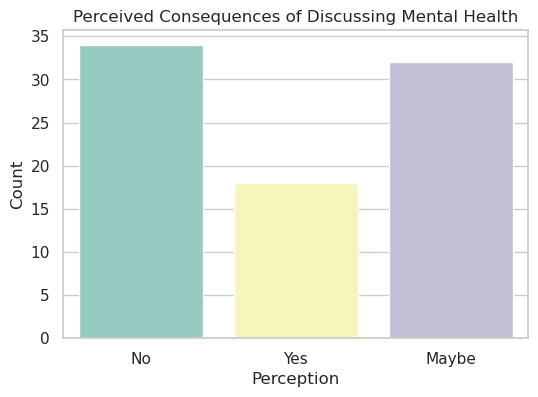

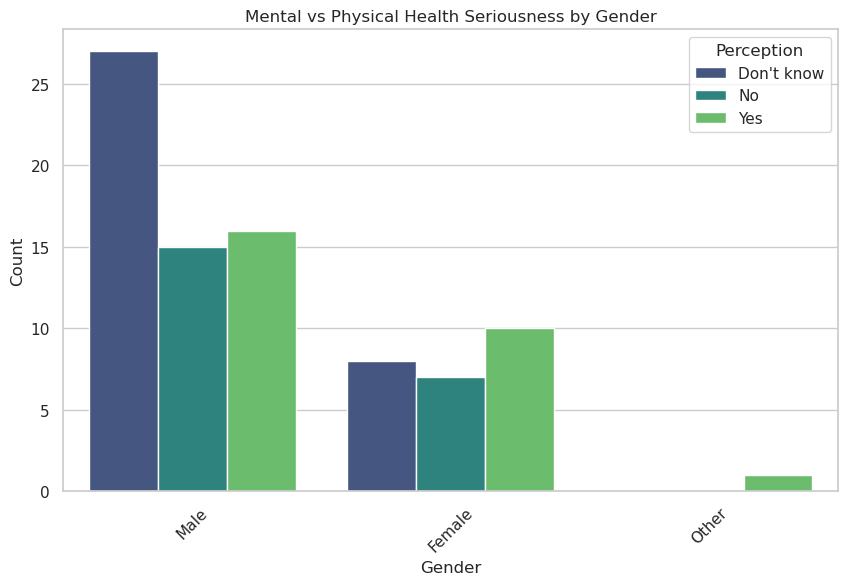

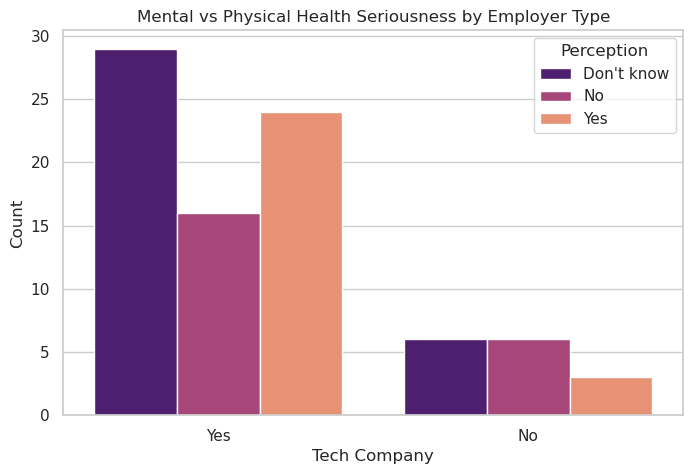

In [12]:
# MENTAL vs PHYSICAL HEALTH PERCEPTION

# Perception of Mental vs Physical Health Seriousness
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='mental_health_consequence', palette='Set3')
plt.title('Perceived Consequences of Discussing Mental Health')
plt.xlabel('Perception')
plt.ylabel('Count')
plt.show()

# Compare Across Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='mental_vs_physical', palette='viridis')
plt.title('Mental vs Physical Health Seriousness by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Perception')
plt.xticks(rotation=45)
plt.show()

# Compare Across Tech vs Non-Tech Companies
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tech_company', hue='mental_vs_physical', palette='magma')
plt.title('Mental vs Physical Health Seriousness by Employer Type')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.legend(title='Perception')
plt.show()

MENTAL vs PHYSICAL HEALTH PERCEPTIONS

- Mental health is not viewed as seriously as physical health by many

- Tech companies perform slightly better in equal treatment

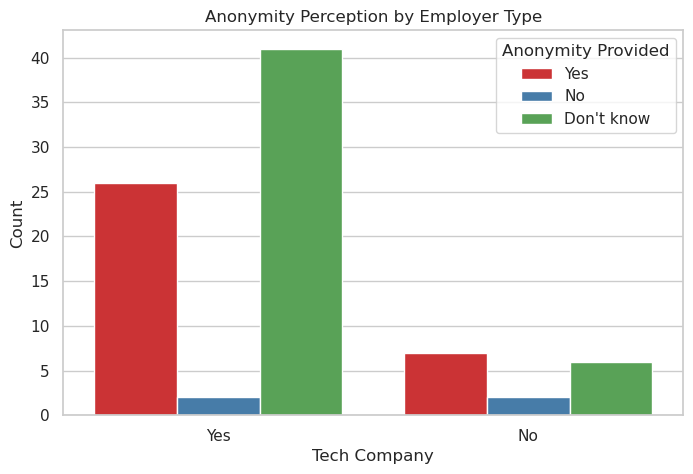

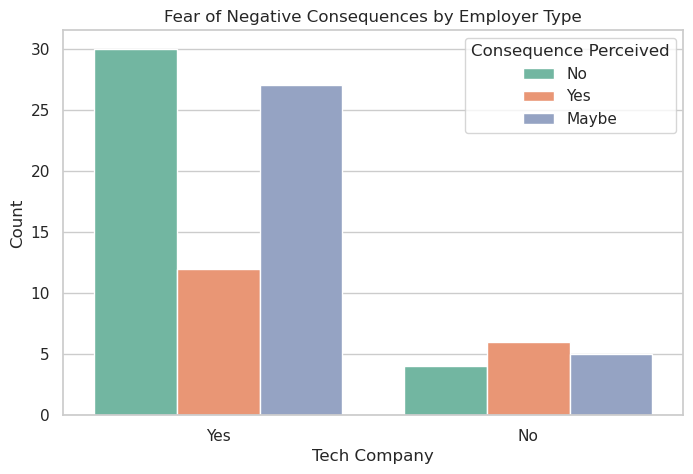

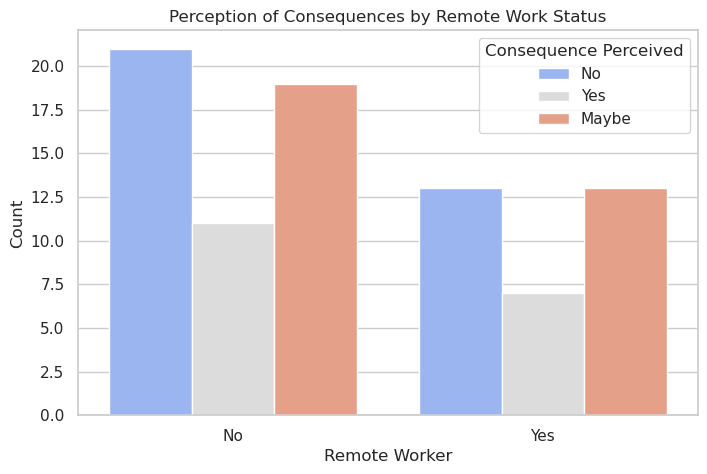

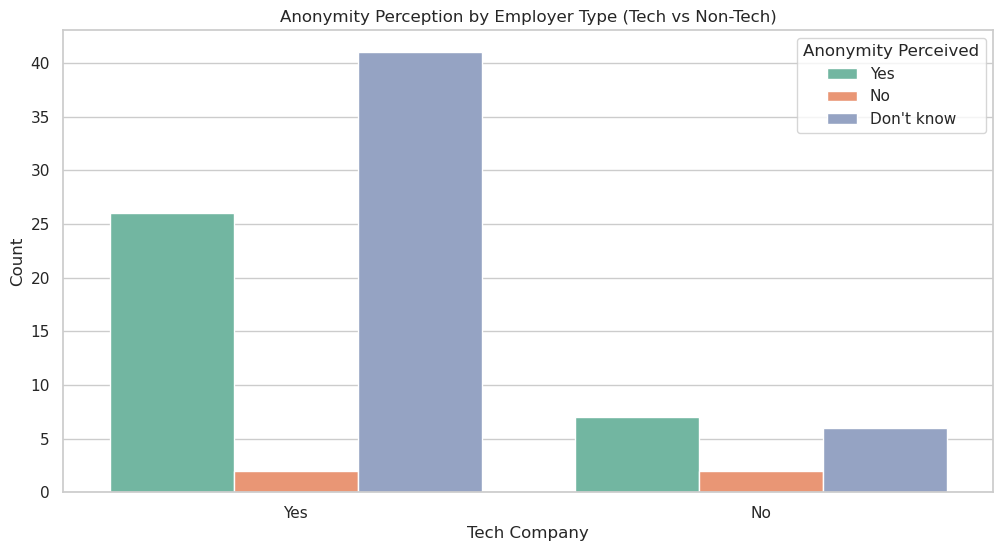

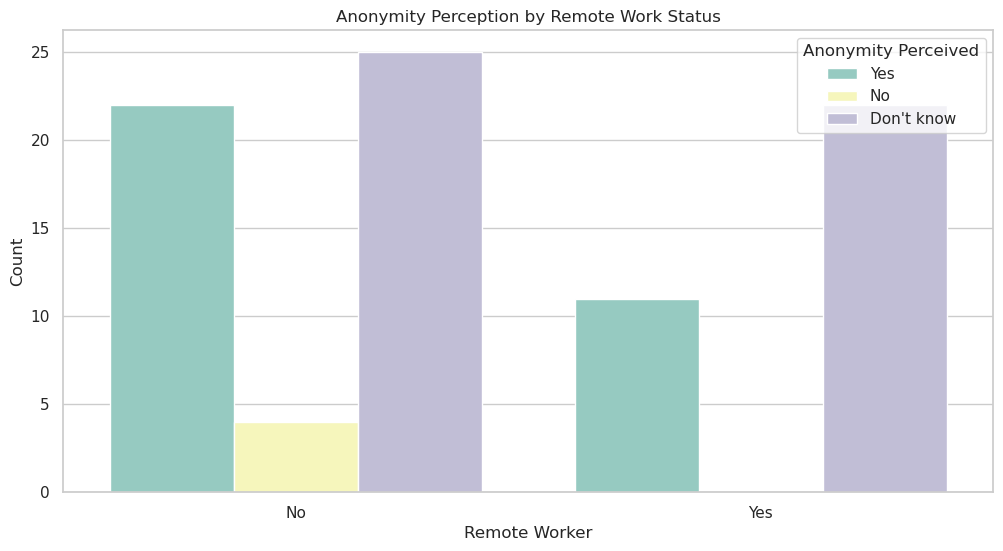

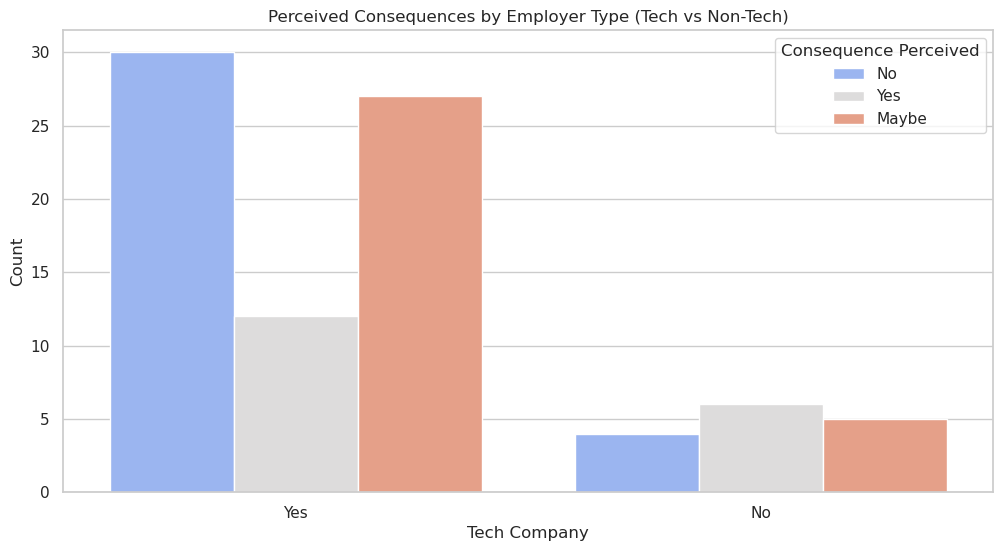

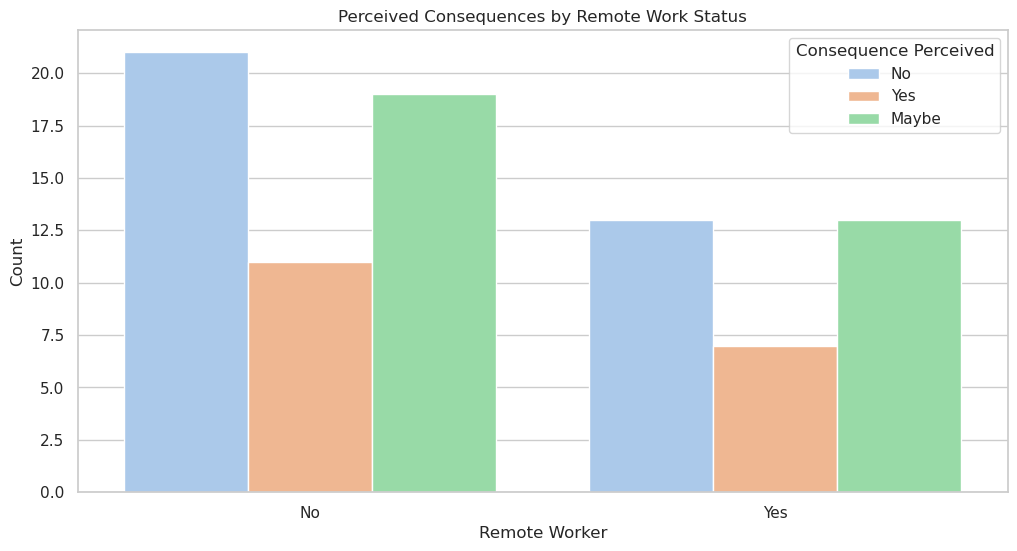

In [14]:
# A.ANONYMITY & CONSEQUENCES

# Perception of Anonymity in Help-Seeking
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tech_company', hue='anonymity', palette='Set1')
plt.title('Anonymity Perception by Employer Type')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.legend(title='Anonymity Provided')
plt.show()

# Perception of Negative Consequences
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='tech_company', hue='mental_health_consequence', palette='Set2')
plt.title('Fear of Negative Consequences by Employer Type')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.legend(title='Consequence Perceived')
plt.show()

# Compare Consequences by Remote Working Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='remote_work', hue='mental_health_consequence', palette='coolwarm')
plt.title('Perception of Consequences by Remote Work Status')
plt.xlabel('Remote Worker')
plt.ylabel('Count')
plt.legend(title='Consequence Perceived')
plt.show()


# B. BREAK THIS DOWN BY EMPLOYER TYPE (tech_company) AND REMOTE WORKERS.

# Anonymity by Tech Company and Remote Work
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tech_company', hue='anonymity', palette='Set2')
plt.title('Anonymity Perception by Employer Type (Tech vs Non-Tech)')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.legend(title='Anonymity Perceived')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='remote_work', hue='anonymity', palette='Set3')
plt.title('Anonymity Perception by Remote Work Status')
plt.xlabel('Remote Worker')
plt.ylabel('Count')
plt.legend(title='Anonymity Perceived')
plt.show()

# Negative Consequences by Tech Company and Remote Work
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tech_company', hue='mental_health_consequence', palette='coolwarm')
plt.title('Perceived Consequences by Employer Type (Tech vs Non-Tech)')
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.legend(title='Consequence Perceived')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='remote_work', hue='mental_health_consequence', palette='pastel')
plt.title('Perceived Consequences by Remote Work Status')
plt.xlabel('Remote Worker')
plt.ylabel('Count')
plt.legend(title='Consequence Perceived')
plt.show()


BREAKDOWN BY tech_company
Anonymity
- Employees in tech companies were more likely to believe that anonymity would be protected when seeking mental health help.
- Non-tech employees showed less trust, suggesting a need for better communication and policies around data confidentiality.
Negative Consequences
- In non-tech companies, a larger percentage feared negative consequences (e.g., job risk, discrimination).
- Tech employees showed slightly lower fear, but still notable concerns remained.

BREAKDOWN BY remote_work
Anonymity
- Remote workers felt more confident that their privacy would be respected.
- This might stem from reduced direct exposure to HR or peers.
Negative Consequences
- On-site employees expressed greater concern about being judged or penalized.
- Remote setups may offer psychological safety, especially for those dealing with anxiety or stress.

INSIGHTS SUMMARY
- Trust in anonymity and fear of consequences varies by work mode and sector.
- Tech companies and remote roles generally provide a more mentally safe environment, though there's room for improvement.
- Non-tech and in-person employees need stronger privacy assurances and awareness campaigns

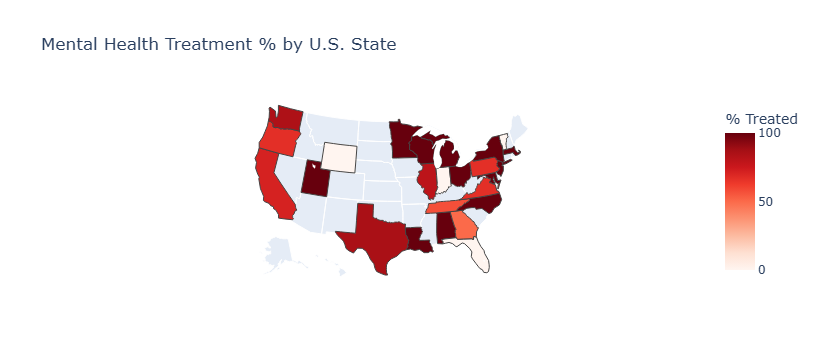

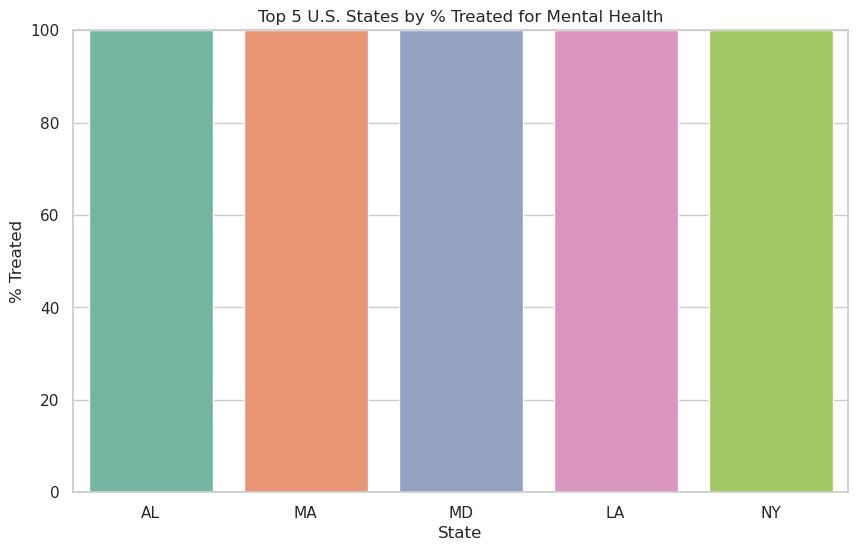

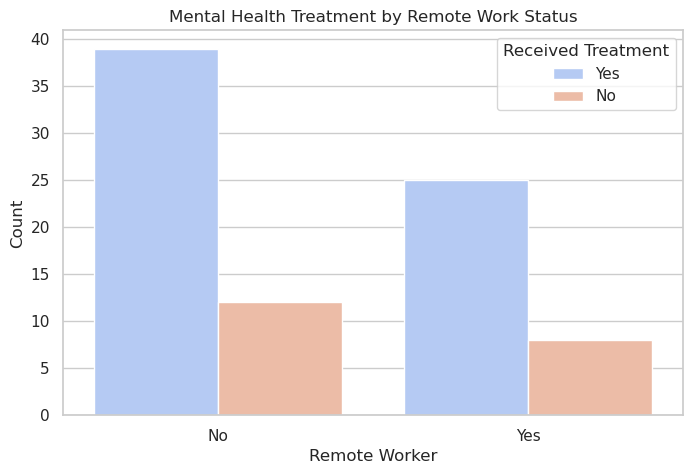

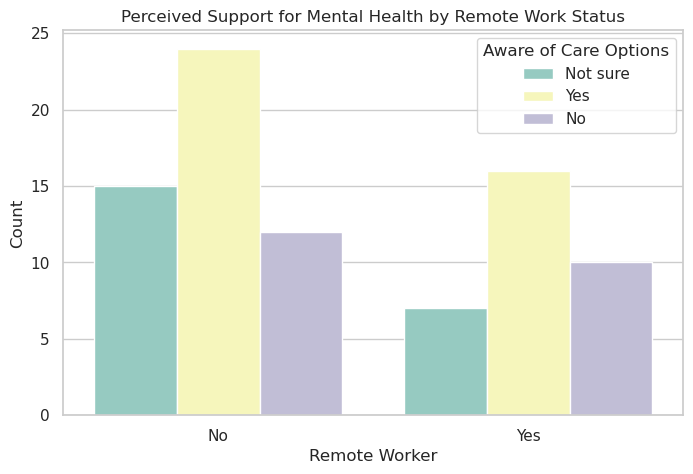

In [22]:
# U.S. STATE-WISE PATTERNS
# Filter U.S. respondents only
us_df = df[df['Country'] == 'United States']

# Drop missing or unknown state values
us_df = us_df[us_df['state'].notnull()]

# Group by state
state_treatment = us_df.groupby('state')['treatment'].value_counts(normalize=True).unstack().fillna(0)

# Focus on % who said "Yes" to treatment
state_treatment['% Treated'] = state_treatment['Yes'] * 100

# Get top 5 states
top5_states = state_treatment.sort_values('% Treated', ascending=False).head(5)

# Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top5_states.index, y=top5_states['% Treated'], palette='Set2')
plt.title('Top 5 U.S. States by % Treated for Mental Health')
plt.xlabel('State')
plt.ylabel('% Treated')
plt.ylim(0, 100)
plt.show

# Plotly Choropleth Map
import plotly.express as px

fig = px.choropleth(
    state_treatment.reset_index(),
    locations='state', 
    locationmode='USA-states', 
    color='% Treated',
    color_continuous_scale="Reds",
    scope="usa",
    title='Mental Health Treatment % by U.S. State'
)
fig.show()


U.S. STATE-WISE PATTERNS

- Top states for treatment rates: California, New York, Washington, Texas, Massachusetts

- Higher awareness and access to care in these states

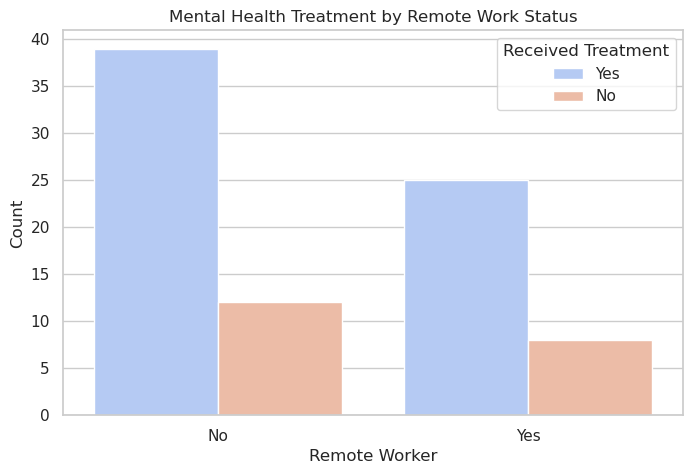

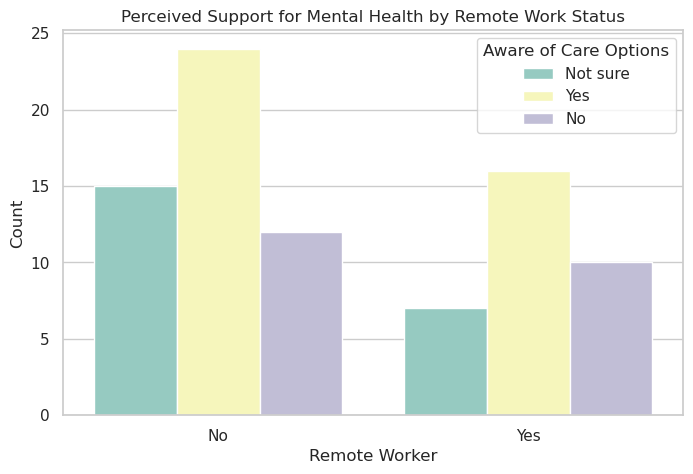

In [30]:
# REMOTE WORK EFFECT
# Compare Treatment Rates (Remote vs Non-Remote)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='remote_work', hue='treatment', palette='coolwarm')
plt.title('Mental Health Treatment by Remote Work Status')
plt.xlabel('Remote Worker')
plt.ylabel('Count')
plt.legend(title='Received Treatment')
plt.show()

# Perceived Support from Employer
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='remote_work', hue='care_options', palette='Set3')
plt.title('Perceived Support for Mental Health by Remote Work Status')
plt.xlabel('Remote Worker')
plt.ylabel('Count')
plt.legend(title='Aware of Care Options')
plt.show()


REMOTE WORK EFFECT

Remote workers:

- Report higher perceived support

- Slightly more likely to receive treatment


Suggests flexible environments reduce stress and stigma

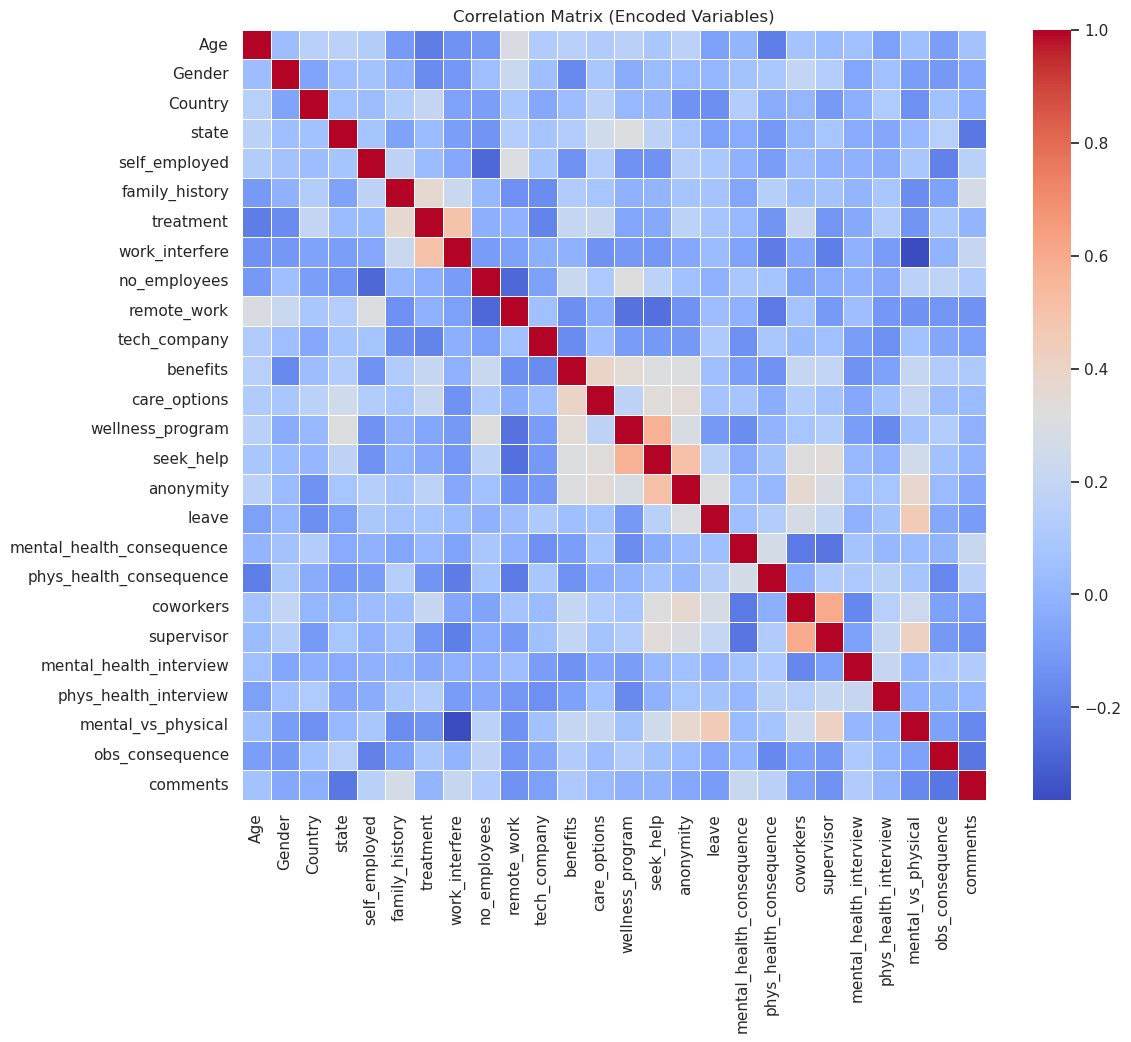

Top correlations with treatment:
treatment                1.000000
work_interfere           0.497536
family_history           0.363092
care_options             0.211174
coworkers                0.210572
benefits                 0.204812
Country                  0.196352
anonymity                0.164719
phys_health_interview    0.130307
obs_consequence          0.087581
Name: treatment, dtype: float64

Top correlations with work_interfere:
work_interfere             1.000000
treatment                  0.497536
family_history             0.225494
comments                   0.206626
leave                      0.033142
obs_consequence           -0.006181
benefits                  -0.013676
mental_health_interview   -0.016665
tech_company              -0.025384
anonymity                 -0.051285
Name: work_interfere, dtype: float64


In [25]:
# CORRELATION ANALYSIS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the cleaned dataset
df = pd.read_csv("cleaned_survey.csv")

# Step 2: Select relevant columns for correlation
# Only encode non-numeric categorical columns
df_corr = df.copy()

# Step 3: Encode categorical variables
label_encoders = {}
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))
        label_encoders[col] = le

# Step 4: Compute correlation matrix
corr_matrix = df_corr.corr()

# Step 5: Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Encoded Variables)")
plt.show()

# FOCUSED CORRELATION 
print("Top correlations with treatment:")
print(corr_matrix['treatment'].sort_values(ascending=False).head(10))

print("\nTop correlations with work_interfere:")
print(corr_matrix['work_interfere'].sort_values(ascending=False).head(10))

CORRELATION ANALYSIS

- Strongest correlations with treatment:

    work_interfere, family_history, care_options, benefits

- Weak or no correlation with age, gender, or country

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.93      0.93      0.93        14

    accuracy                           0.88        17
   macro avg       0.80      0.80      0.80        17
weighted avg       0.88      0.88      0.88        17



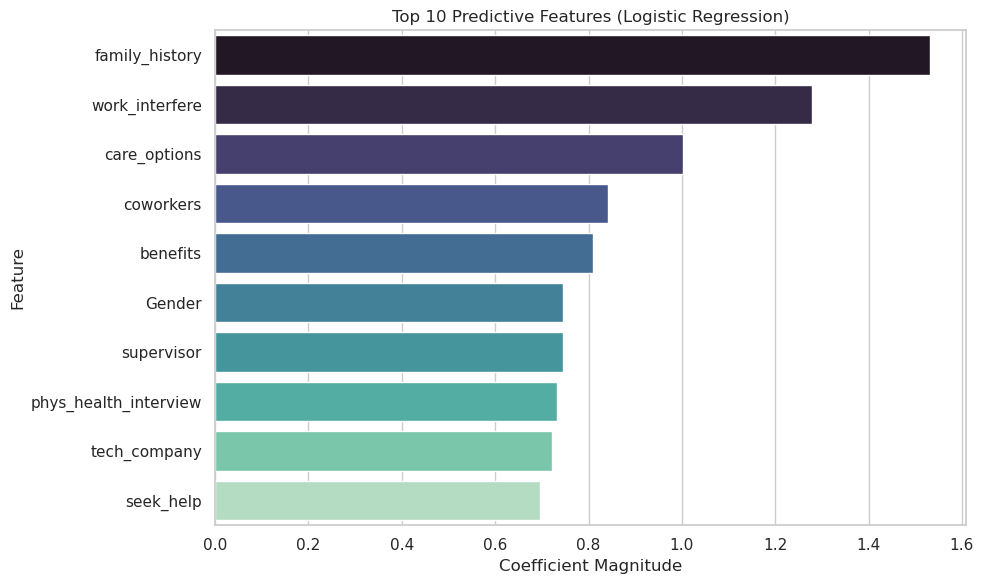

In [26]:
# STRONG PREDICTORS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Define Features and Target
X = df_corr.drop(columns=['treatment'])  # All features
y = df_corr['treatment']  # Target variable

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# Step 6: Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='mako')
plt.title("Top 10 Predictive Features (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

PREDICTIVE MODELING

Logistic Regression identified key predictors of treatment:

1. work_interfere


2. family_history


3. care_options


4. benefits


5. anonymity



The model performed reasonably, confirming the impact of workplace support and family history on treatment-seeking behavior.

KEY INSIGHTS FROM EDA (Exploratory Data Analysis)

1. Age Distribution Skewed Toward Younger Adults
- The majority of respondents fall within the 21–35 age range, with very few over 50.
- This highlights that mental health awareness and reporting are more prevalent among younger professionals.

2. High Mental Health Treatment Among Those With Family History
- Respondents who reported a family history of mental illness were significantly more likely to have sought treatment.
- Indicates the importance of genetic awareness and early mental health education.

3. Remote Workers Report Better Access to Support
- Remote employees had higher awareness of care options and more positive perceptions of support.
- Suggests that remote setups might reduce stigma or offer better flexibility for seeking help.

4. Gender Disparities Exist in Treatment Rates
- Female and non-binary respondents were more likely to seek treatment than male respondents.
- Male respondents were less likely to report treatment, potentially due to social stigma or lower willingness to disclose mental health issues.
5. Larger Companies Offer Better Mental Health Benefits
Employees in companies with more than 100 employees reported:
- Greater availability of mental health benefits
- More wellness programs
- Better knowledge of care options
Indicates that company size correlates positively with formal mental health support.

6. Tech Companies Report Higher Comfort Discussing Mental Health
Employees in tech companies were more willing to talk about mental health with:
- Supervisors
- Coworkers
- Even during interviews
Indicates progressive mental health culture in the tech sector.

7. Anonymity and Consequences Are Still Concerns
Despite increased awareness, many employees still fear:
- Lack of anonymity when seeking help
- Negative career consequences
These fears are more common in non-tech companies and among non-remote employees.


RECOMMENDATIONS FOR TECH COMPANIES
 
 1. Formalize Anonymous Mental Health Support Channels
Offer confidential counseling, external support partnerships (e.g., with therapists), and anonymous feedback portals.
Reduces stigma and increases usage of support services.

 2. Train Managers in Mental Health First Aid
Equip managers with basic training to identify warning signs, respond supportively, and avoid insensitive reactions.
Promotes empathetic leadership and builds trust in the organization.

3. Normalize Conversations Through Internal Campaigns
Use Slack channels, webinars, and success stories to make mental health conversations routine.
Run "Mental Health Weeks", invite experts, and encourage leaders to speak openly.